In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import rankdata

In [2]:
data = pd.read_csv('../main/log/mut_step_ext.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log", "garbage"])

In [3]:
data.head()

algo  mut_step                         experiment_id  \
0  SLIM*1SIG  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
1  SLIM*1SIG  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
2  SLIM*1SIG  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
3  SLIM*1SIG  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
4  SLIM*1SIG  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   

                   dataset  seed  generation  training_fitness    timing  \
0  rastrigin_(0, 1)_(0, 1)     0           0          0.279292  0.110026   
1  rastrigin_(0, 1)_(0, 1)     0           1          0.277033  0.088021   
2  rastrigin_(0, 1)_(0, 1)     0           2          0.277033  0.035008   
3  rastrigin_(0, 1)_(0, 1)     0           3          0.272484  0.064016   
4  rastrigin_(0, 1)_(0, 1)     0           4          0.272484  0.039008   

   pop_node_count  test_fitness  elite_size  log  garbage  
0          1438.0      0.275679           7    1    False  
1          1690.0      0.273130          13    1    False  
2          1024.0      0.273130          13    1     True  
3          1264.0      0.268907          13    1    False  
4           942.0      0.268907          13    1     True

In [4]:
data.dataset.unique()

array(['rastrigin_(0, 1)_(0, 1)', 'rastrigin_(0, 1)_(0, 10)',
       'rastrigin_(0, 1)_(0, 100)', 'rastrigin_(0, 1)_(0, 1000)',
       'rastrigin_(0, 10)_(0, 1)', 'rastrigin_(0, 100)_(0, 1)',
       'rastrigin_(0, 1000)_(0, 1)', 'rastrigin_(0, 10)_(0, 10)',
       'rastrigin_(0, 100)_(0, 100)', 'rastrigin_(0, 1000)_(0, 1000)',
       'sphere_(0, 1)_(0, 1)', 'sphere_(0, 1)_(0, 10)',
       'sphere_(0, 1)_(0, 100)', 'sphere_(0, 1)_(0, 1000)',
       'sphere_(0, 10)_(0, 1)', 'sphere_(0, 100)_(0, 1)',
       'sphere_(0, 1000)_(0, 1)', 'sphere_(0, 10)_(0, 10)',
       'sphere_(0, 100)_(0, 100)', 'sphere_(0, 1000)_(0, 1000)',
       'rosenbrock_(0, 1)_(0, 1)', 'rosenbrock_(0, 1)_(0, 10)',
       'rosenbrock_(0, 1)_(0, 100)', 'rosenbrock_(0, 1)_(0, 1000)',
       'rosenbrock_(0, 10)_(0, 1)', 'rosenbrock_(0, 100)_(0, 1)',
       'rosenbrock_(0, 1000)_(0, 1)', 'rosenbrock_(0, 10)_(0, 10)',
       'rosenbrock_(0, 100)_(0, 100)', 'rosenbrock_(0, 1000)_(0, 1000)',
       'ackley_(0, 1)_(0, 1)', 'a

In [5]:
data.dropna(inplace = True)

In [6]:
data['output_scale'] = data.dataset.apply(lambda x: x.split('_')[-1])
data['input_scale'] = data.dataset.apply(lambda x: x.split('_')[-2])
data['dataset'] = data.dataset.apply(lambda x: x.split('_')[0])
data['algo'] = data['algo'] + '_' + data['mut_step']

In [7]:
data.head()

algo  mut_step                         experiment_id  \
0  SLIM*1SIG_(0, 0.1)  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
1  SLIM*1SIG_(0, 0.1)  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
2  SLIM*1SIG_(0, 0.1)  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
3  SLIM*1SIG_(0, 0.1)  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   
4  SLIM*1SIG_(0, 0.1)  (0, 0.1)  bbfa3971-33af-11ef-9bfc-049226d8b1cb   

     dataset  seed  generation  training_fitness    timing  pop_node_count  \
0  rastrigin     0           0          0.279292  0.110026          1438.0   
1  rastrigin     0           1          0.277033  0.088021          1690.0   
2  rastrigin     0           2          0.277033  0.035008          1024.0   
3  rastrigin     0           3          0.272484  0.064016          1264.0   
4  rastrigin     0           4          0.272484  0.039008           942.0   

   test_fitness  elite_size  log  garbage output_scale input_scale  
0      0.275679           7    1    False       (0, 1)      (0, 1)  
1      0.273130          13    1    False       (0, 1)      (0, 1)  
2      0.273130          13    1     True       (0, 1)      (0, 1)  
3      0.268907          13    1    False       (0, 1)      (0, 1)  
4      0.268907          13    1     True       (0, 1)      (0, 1)

In [8]:
algorithms = ['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']

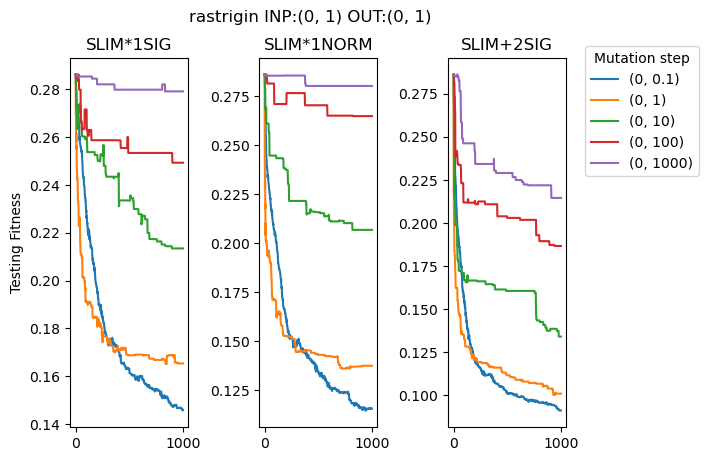

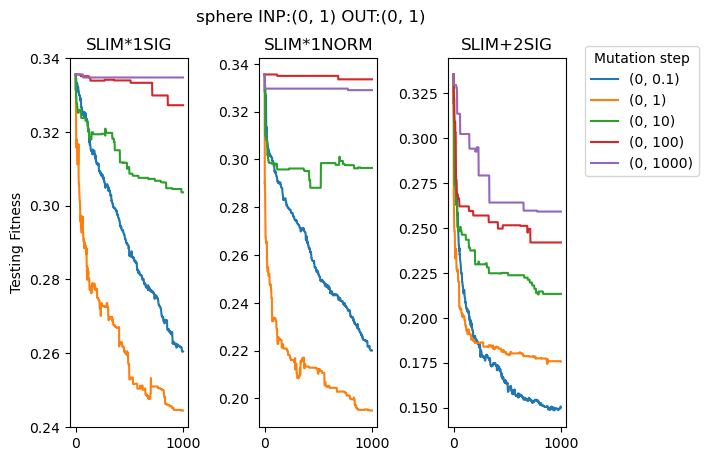

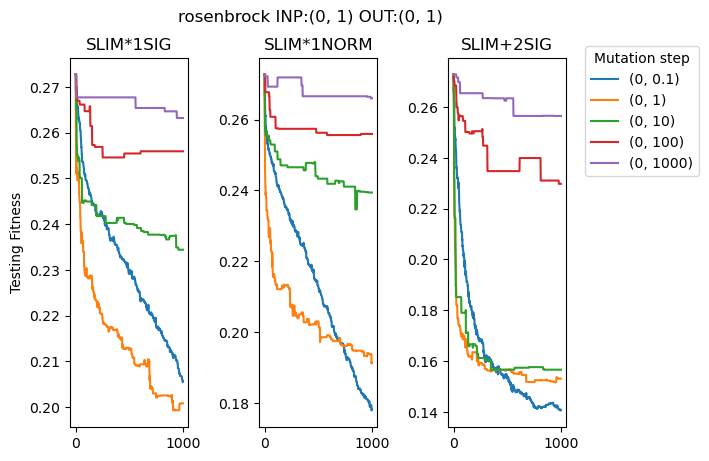

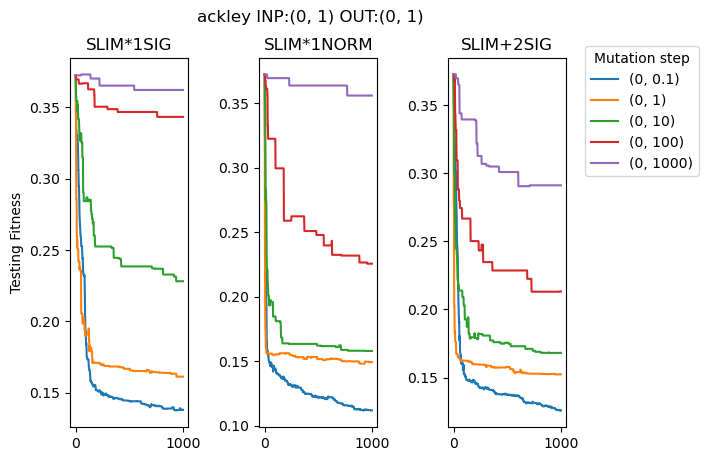

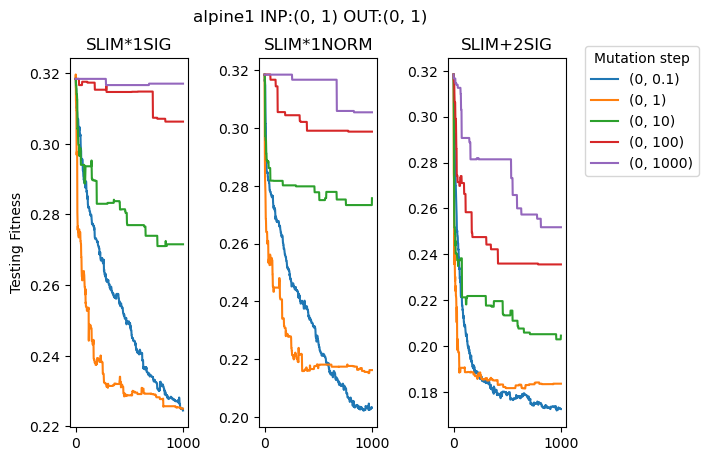

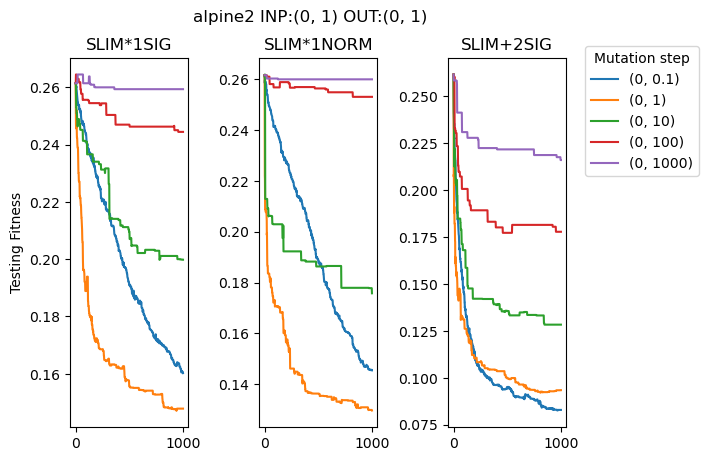

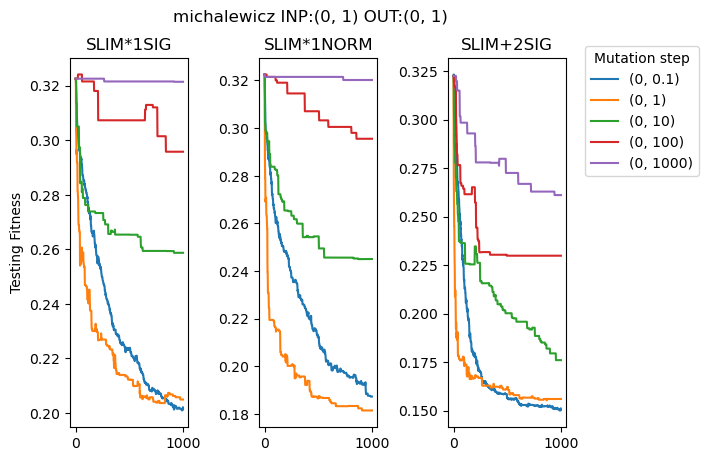

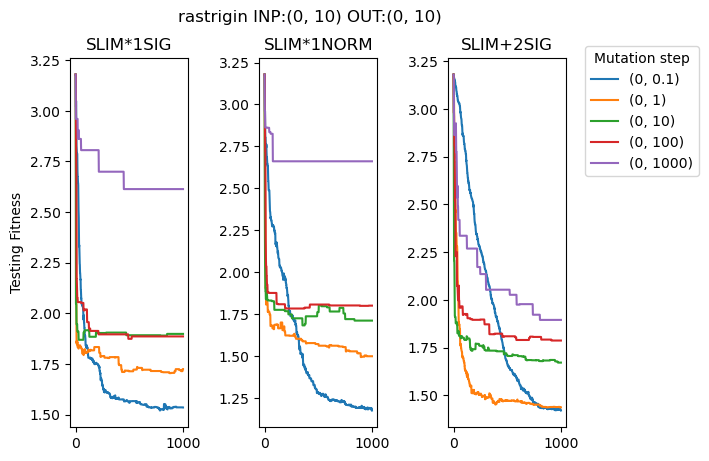

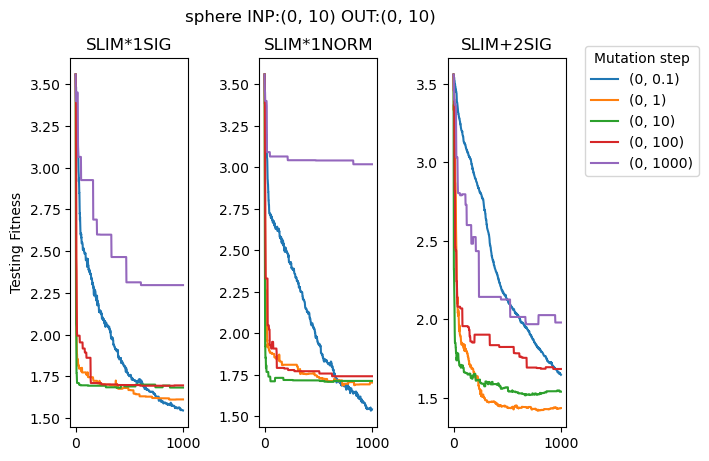

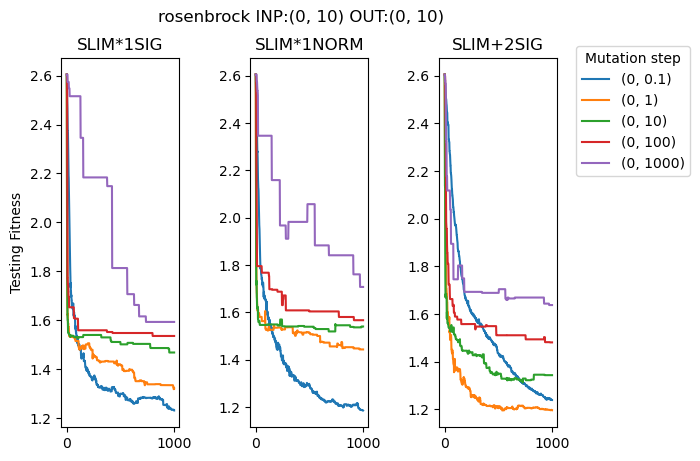

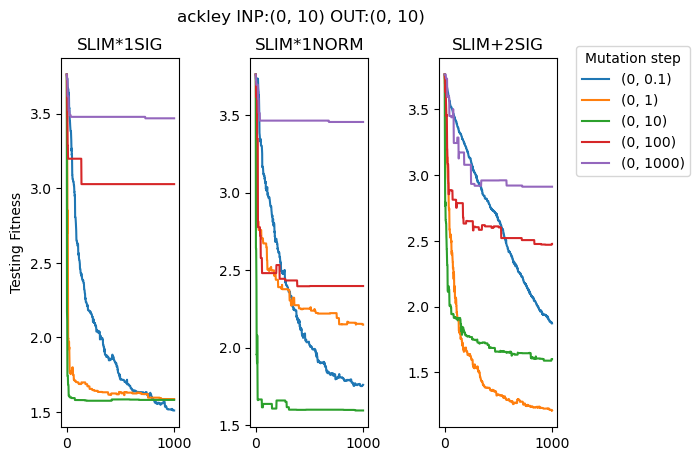

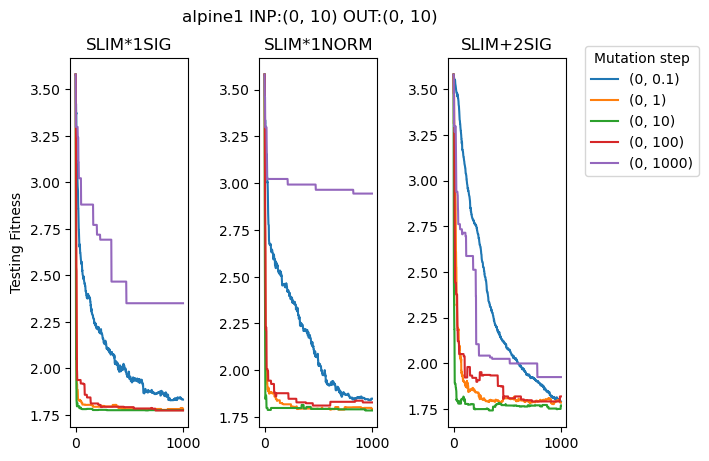

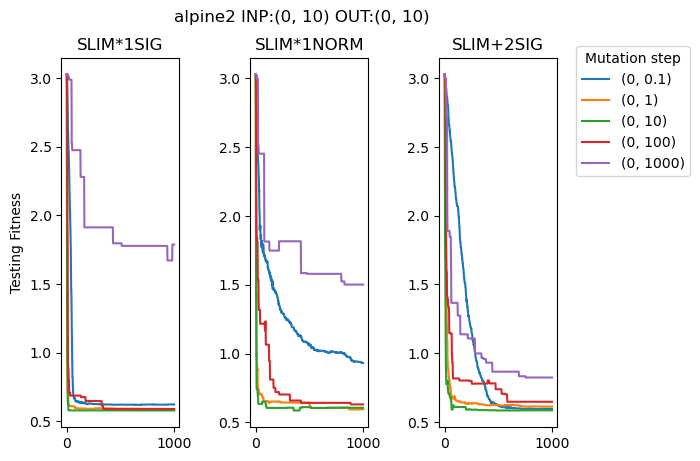

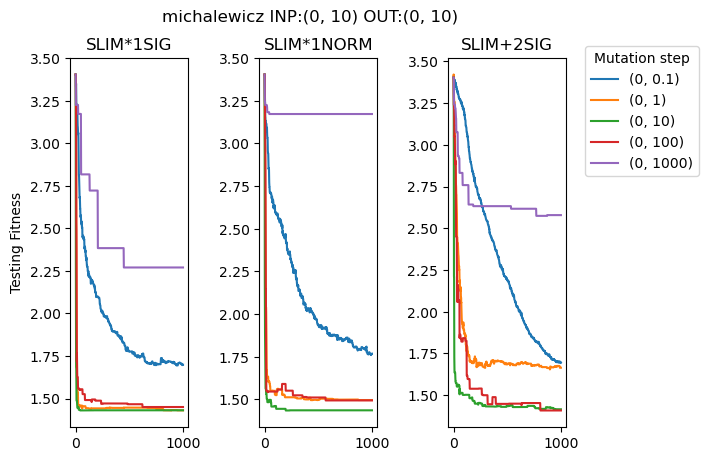

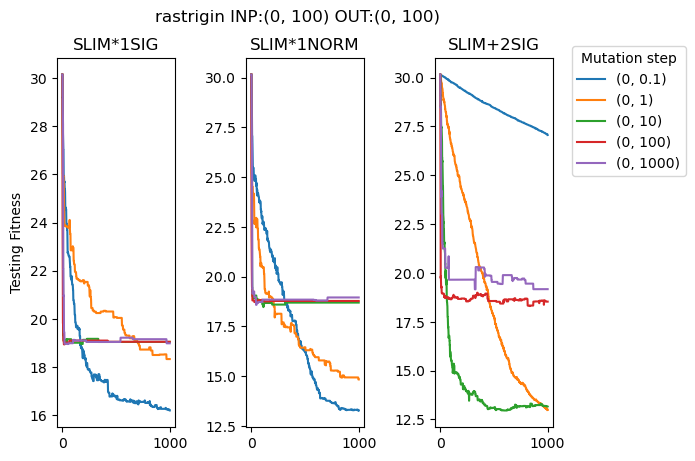

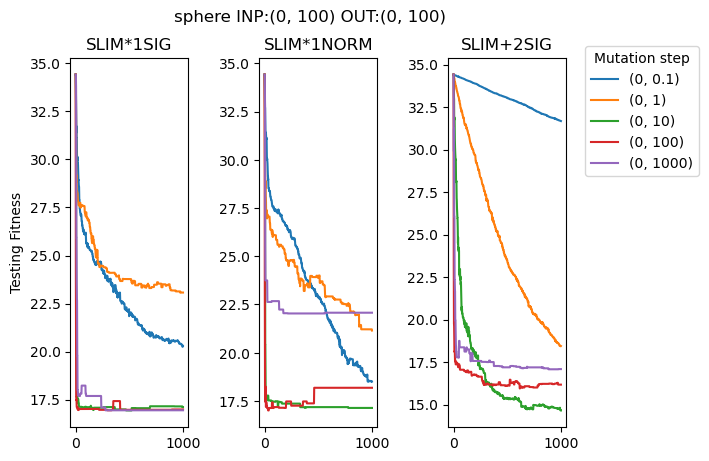

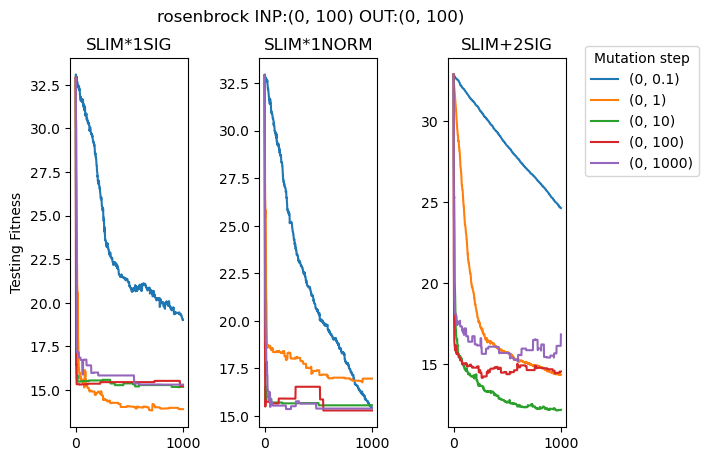

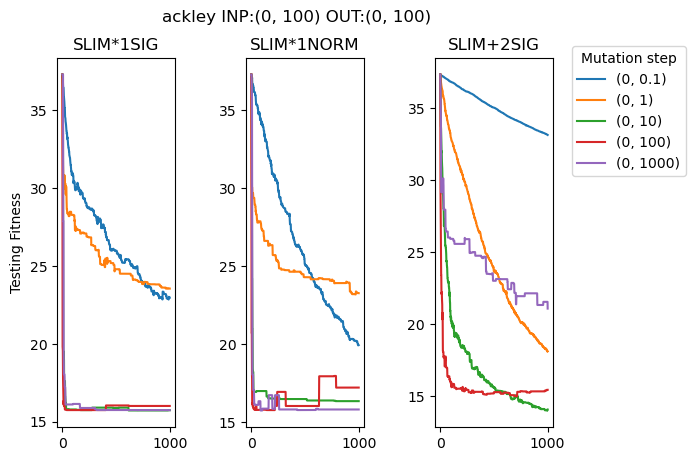

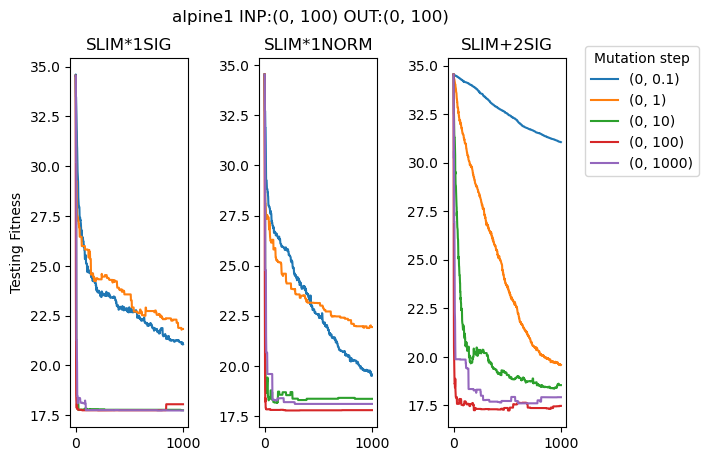

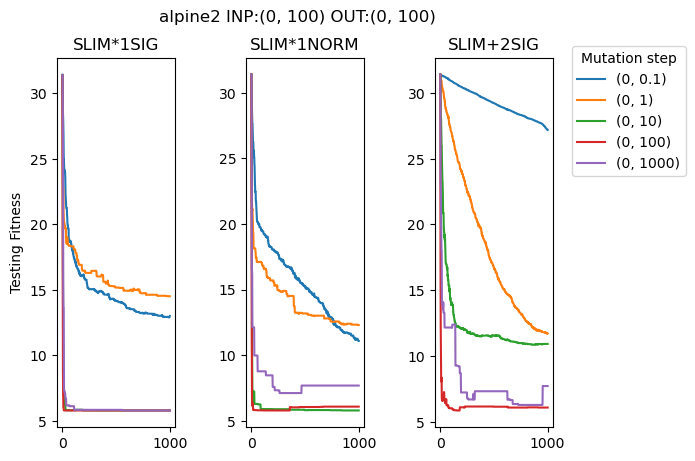

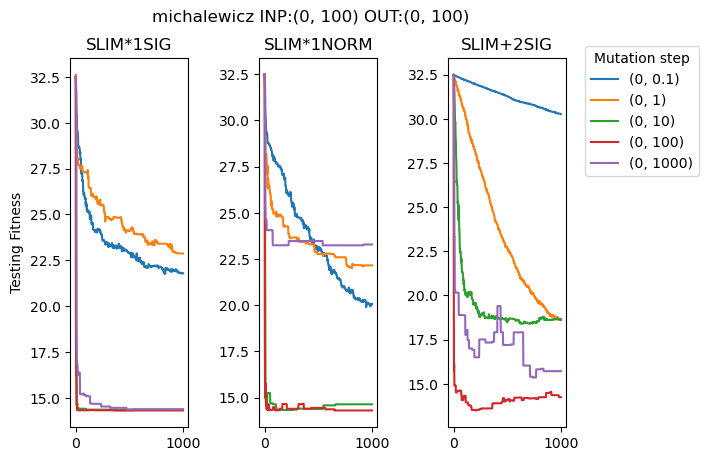

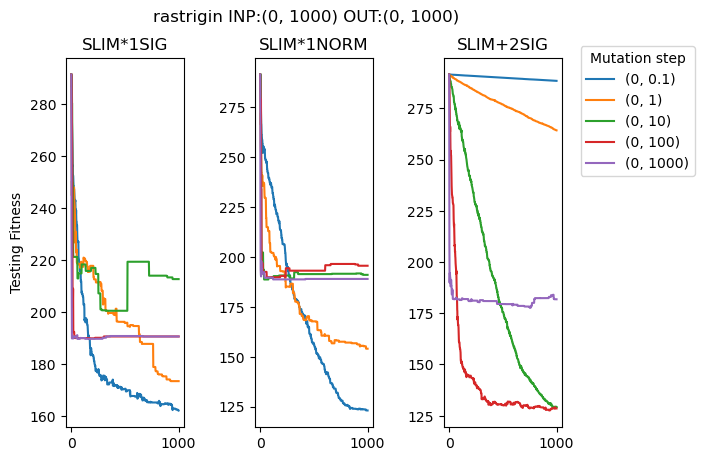

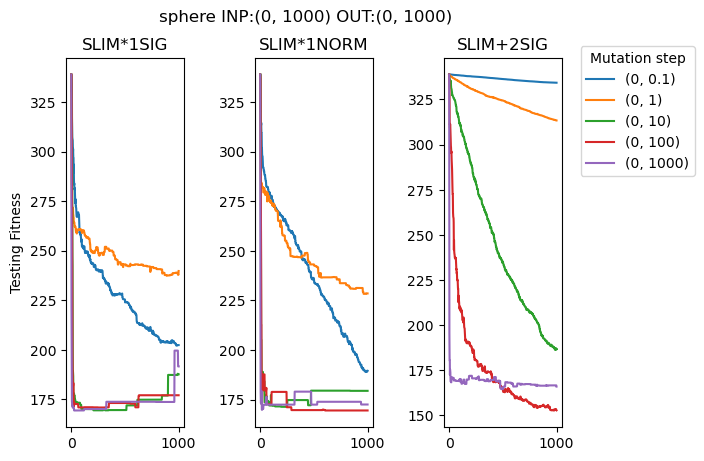

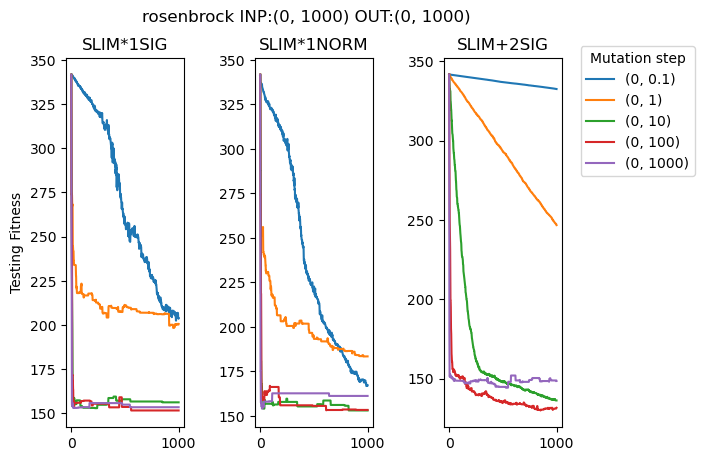

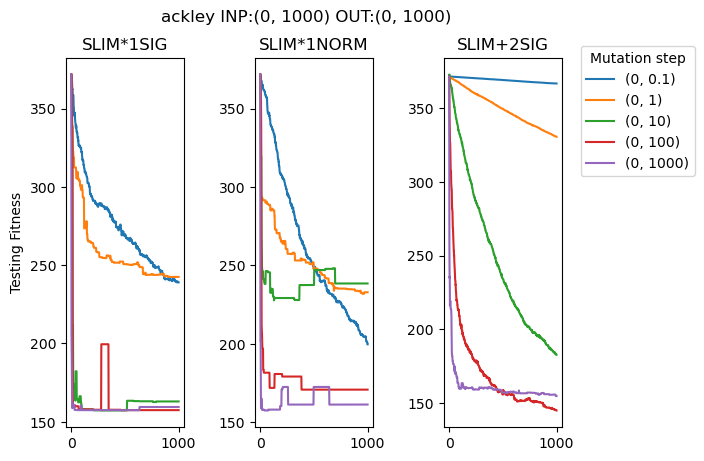

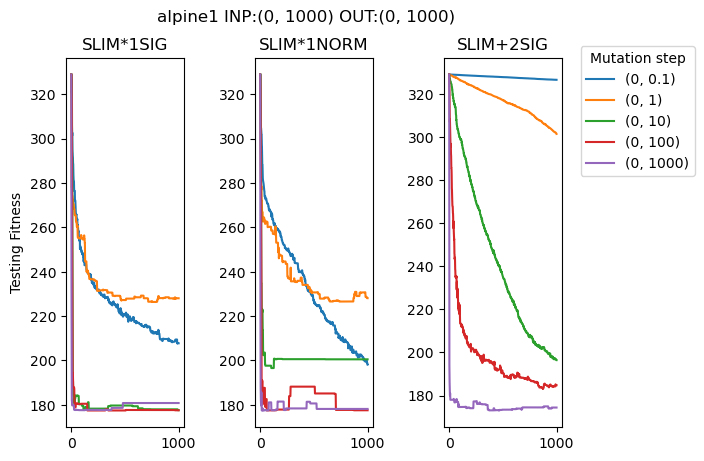

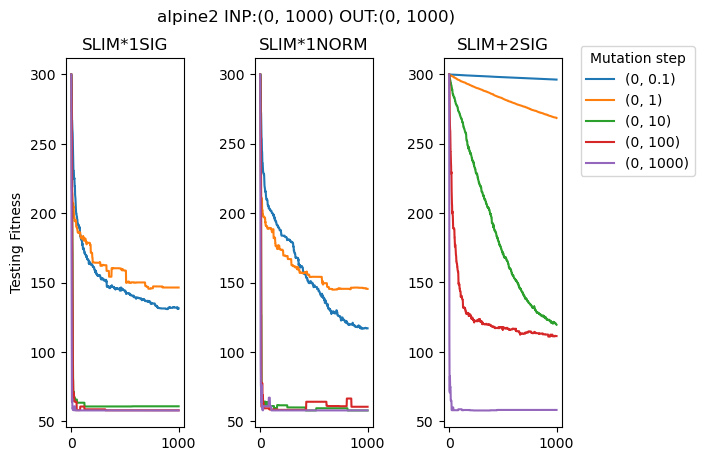

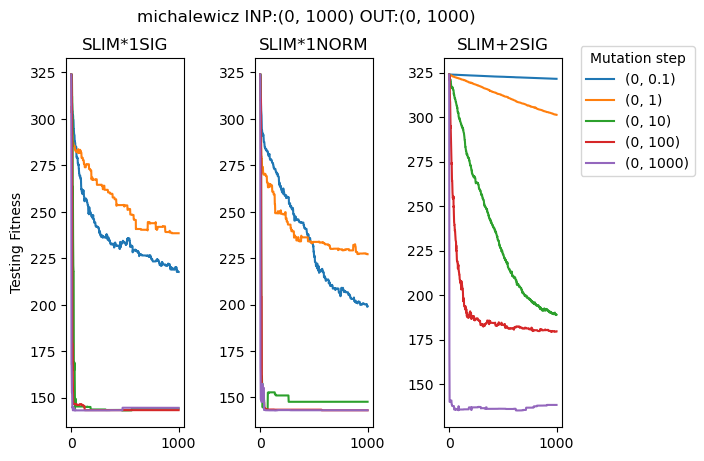

In [9]:
for out in data['output_scale'].unique():
    for inp in data['input_scale'].unique():
        for dataset in data['dataset'].unique():
            
            grouped = data.query("dataset == @dataset and output_scale == @out and input_scale == @inp") \
            [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
            
#             for algo in data["algo"].unique():
        
            

#             ax1 = pl.subplot(gs[0, 0]) 
#             pl.plot(grouped.index, grouped['training_fitness'], label = algo)
#             ax1.set_ylabel('Training Fitness')
#             ax1.set_title(data)
            if not grouped.values.shape[0] == 0 and out == inp:
            
                grouped.reset_index(inplace = True)

                
                gs = gridspec.GridSpec(1, 3)
                gs.update( wspace=0.6, hspace =  0.5)
                pl.figure()

                plt.suptitle(dataset + ' INP:' + str(inp) + ' OUT:' + str(out))
        
                for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
                    ax1 = pl.subplot(gs[0, 0]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
                    ax1.set_ylabel('Testing Fitness')
                    ax1.set_title(algorithms[0])
                    
                for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
                    ax2 = pl.subplot(gs[0, 1]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
                    ax2.set_title(algorithms[1])

                for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
                    ax3 = pl.subplot(gs[0, 2]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
                    ax3.set_title(algorithms[2])
                    ax3.legend(bbox_to_anchor=(1.1, 1.05), title = 'Mutation step')

                plt.show()


#             ax3 = pl.subplot(gs[0, 2]) 
#             pl.plot(grouped.index, grouped['elite_size'], label = algo)
#             ax3.set_ylim(0, 3000)
#             ax3.set_ylabel('Elite size')
#             ax3.legend(bbox_to_anchor=(1.1, 1.05))
    

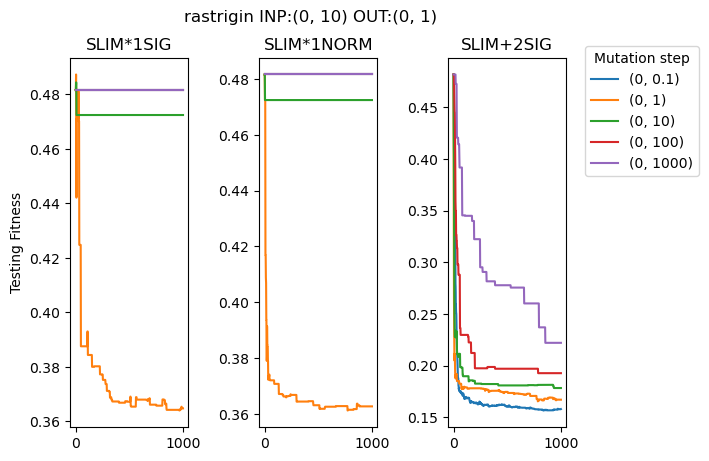

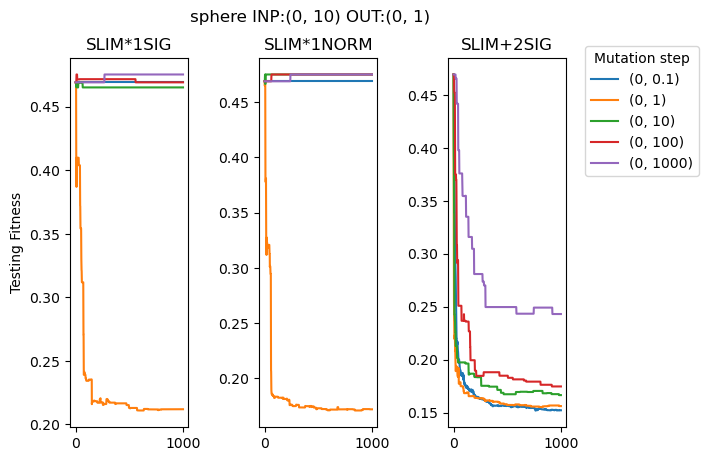

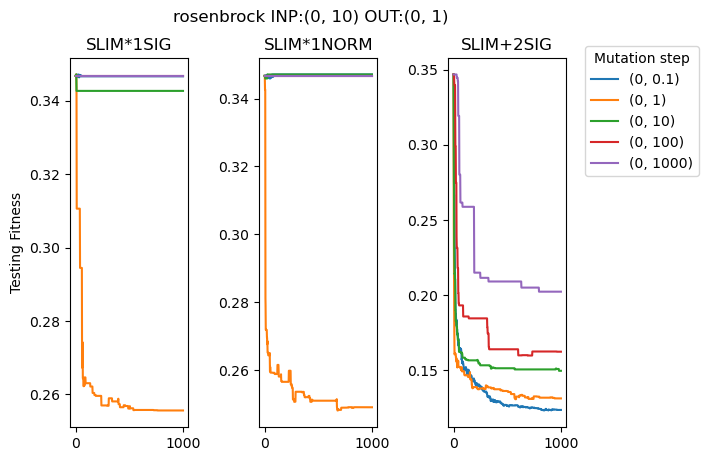

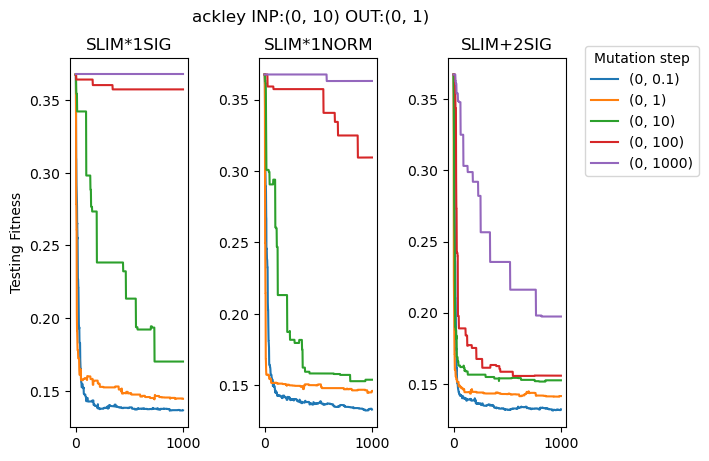

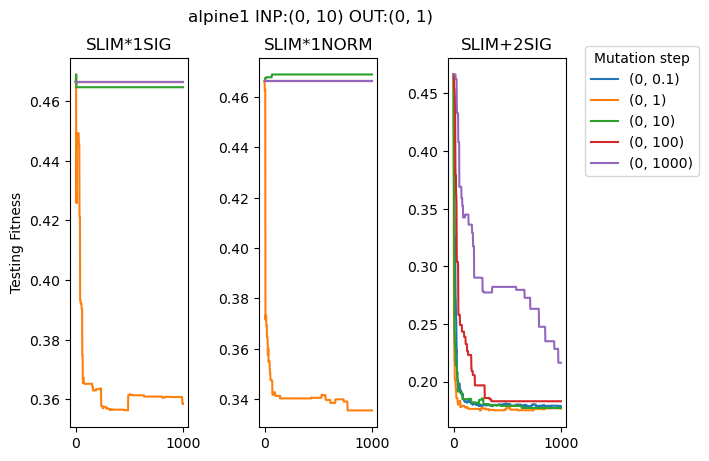

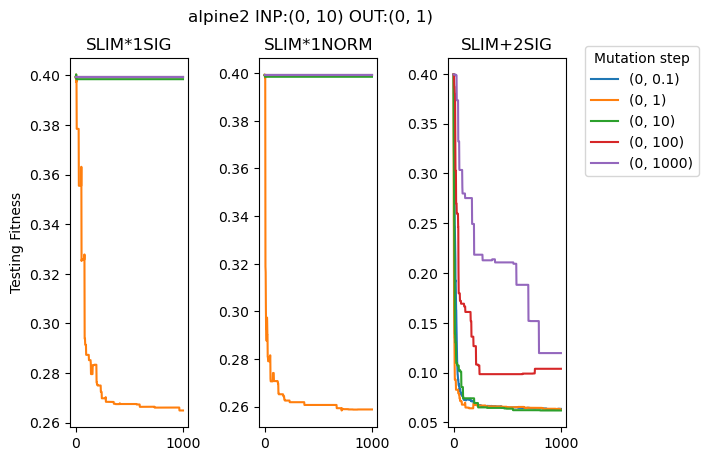

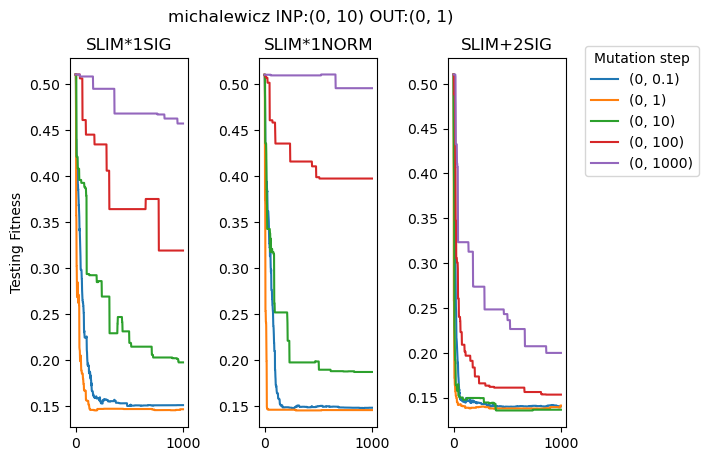

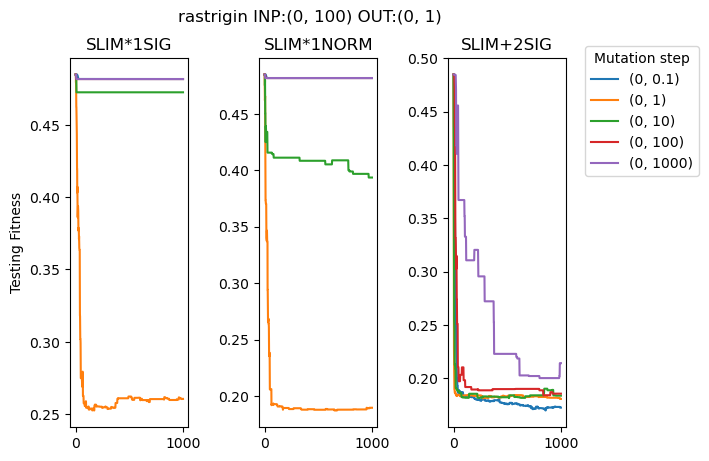

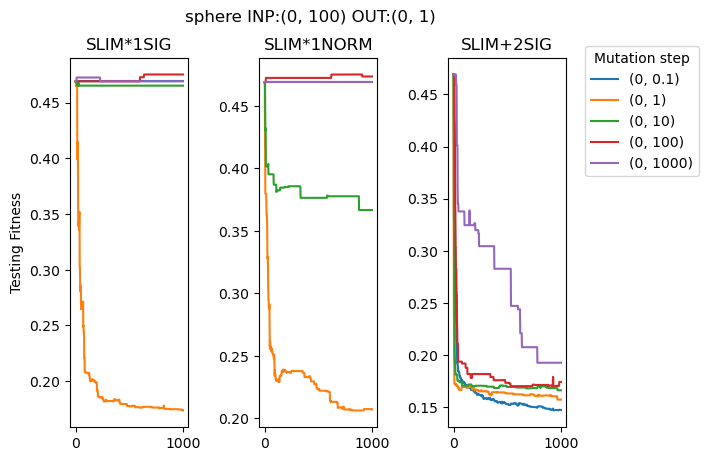

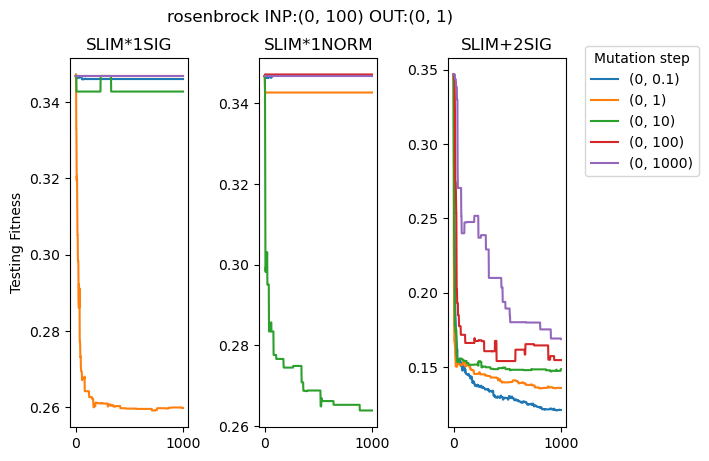

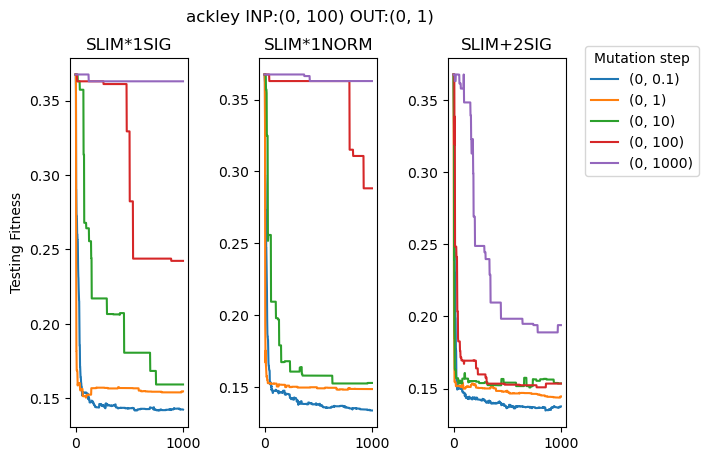

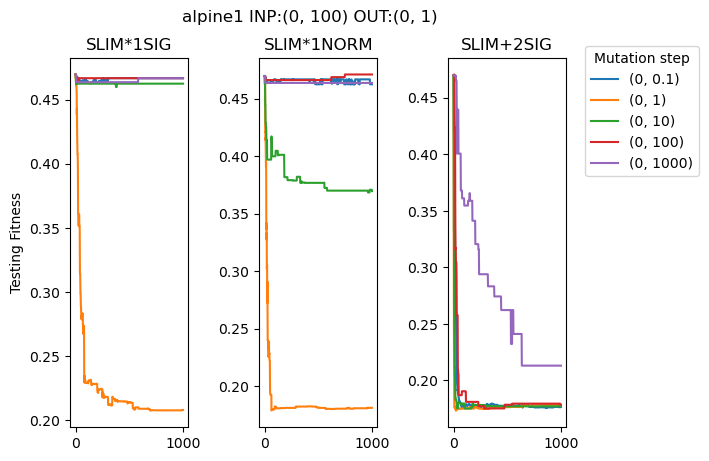

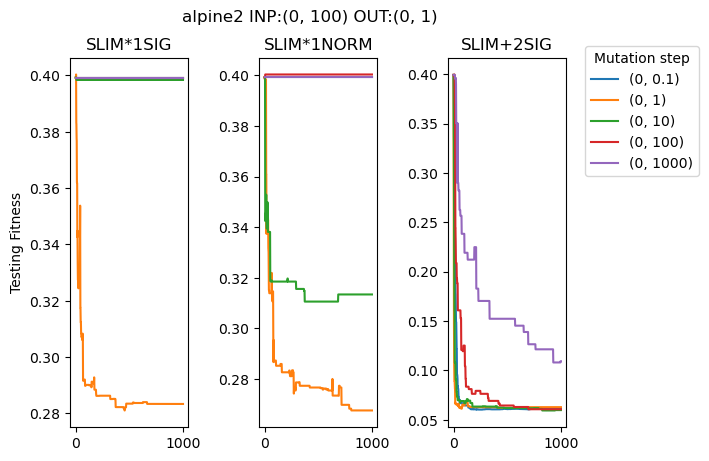

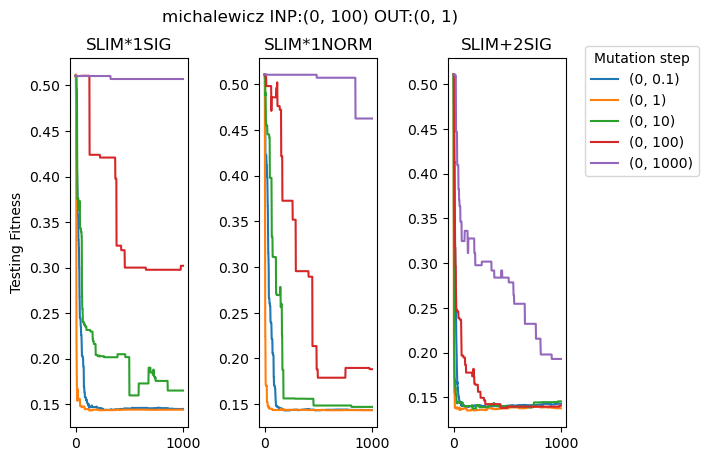

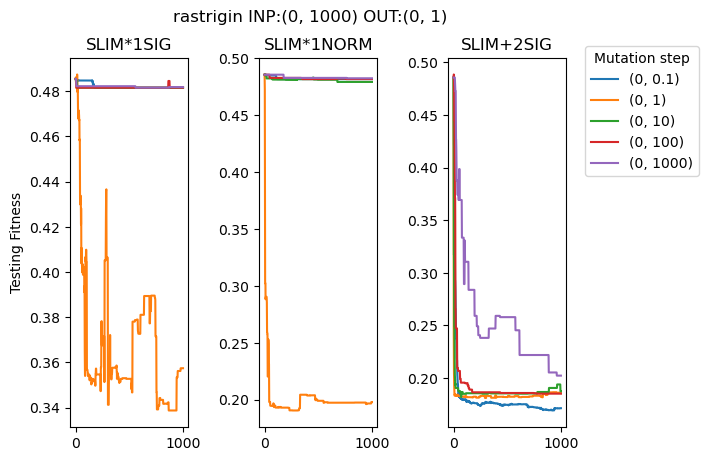

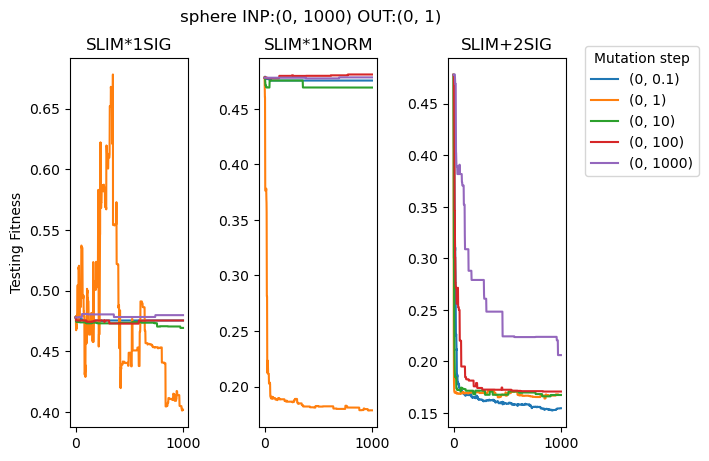

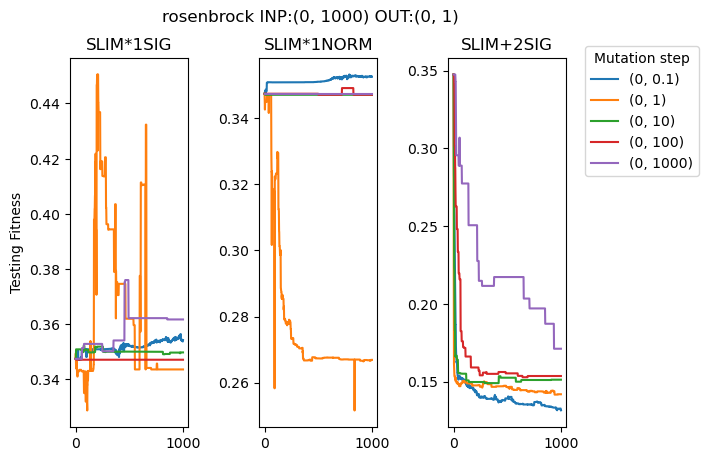

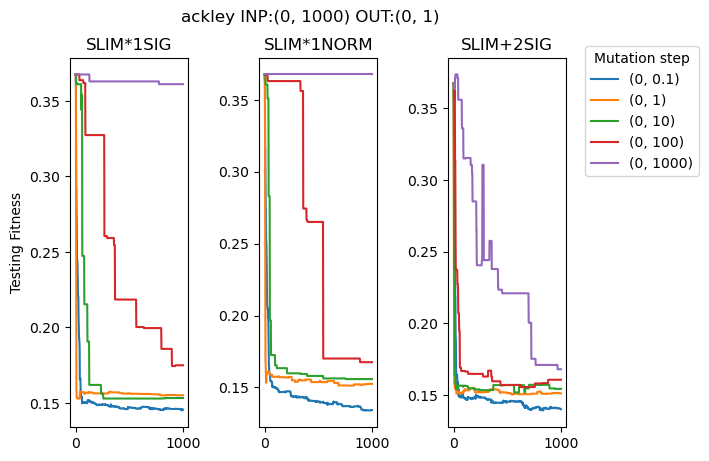

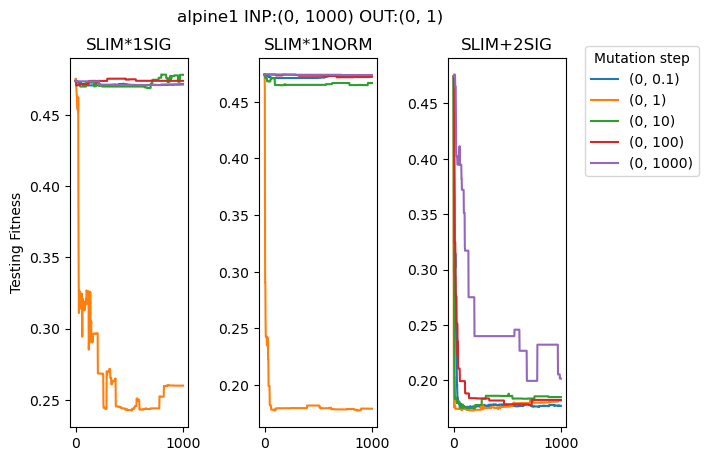

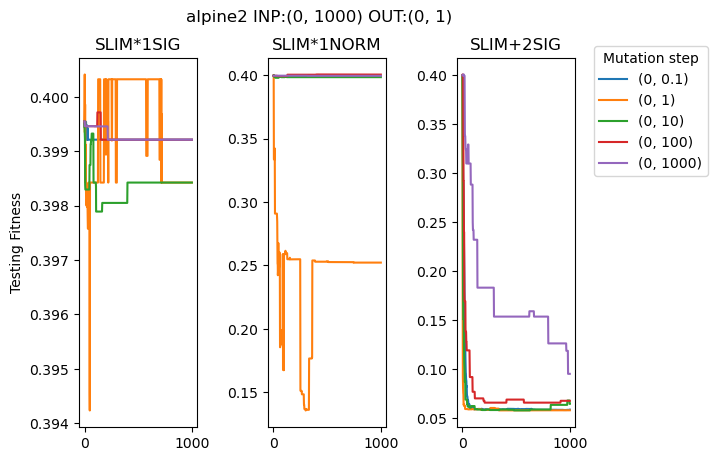

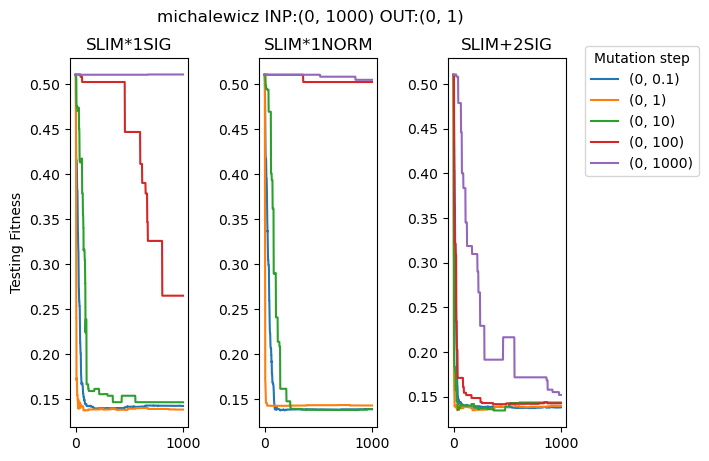

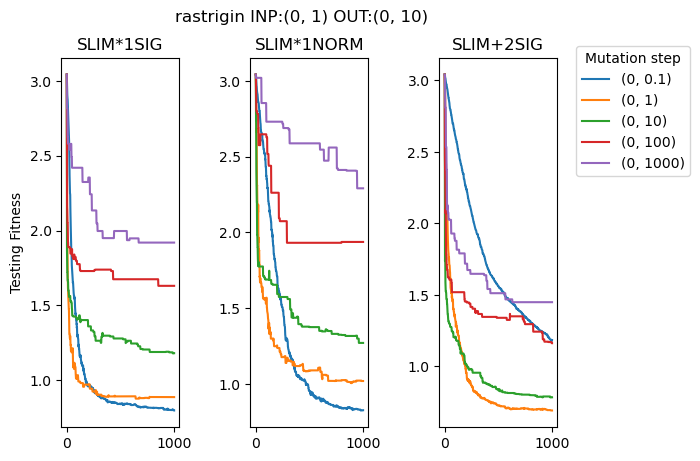

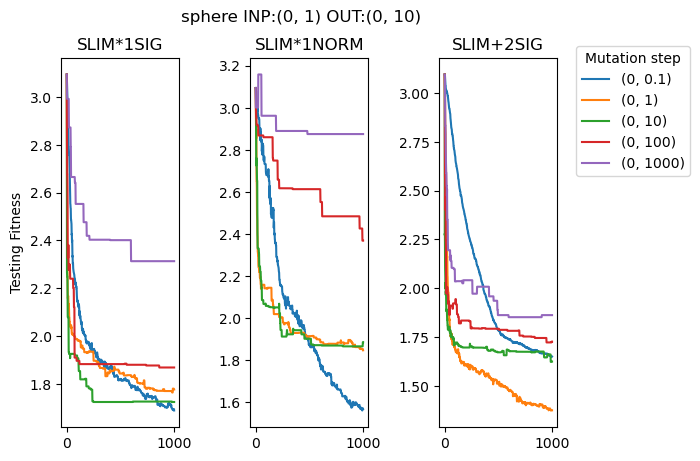

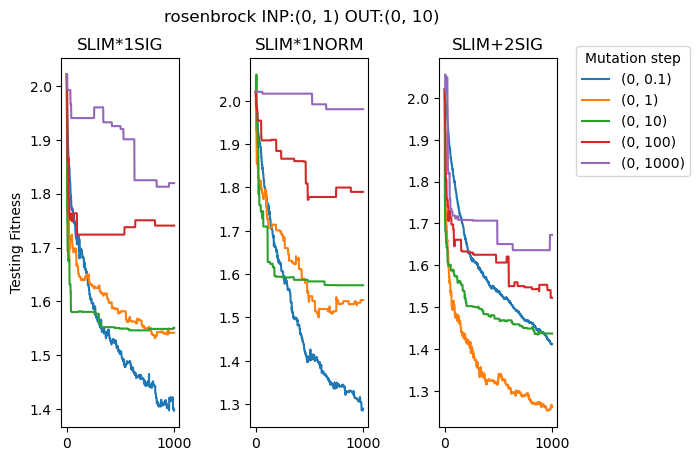

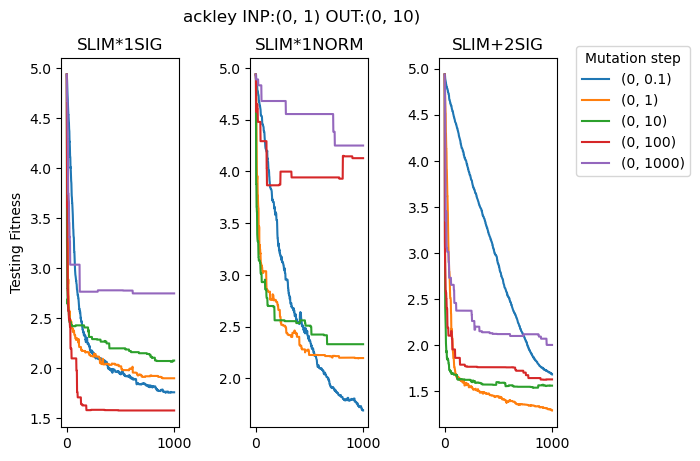

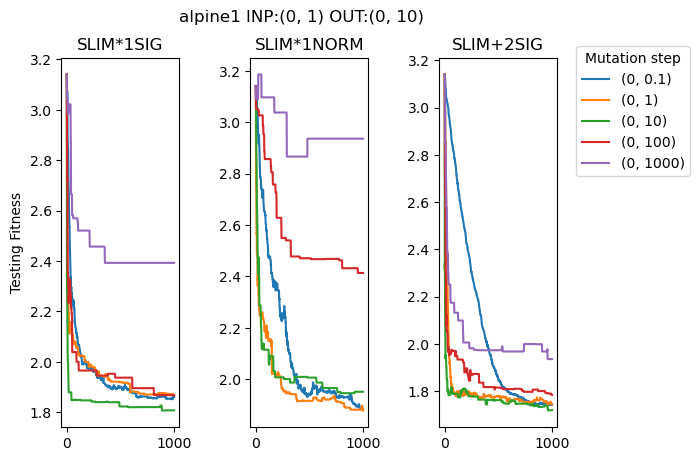

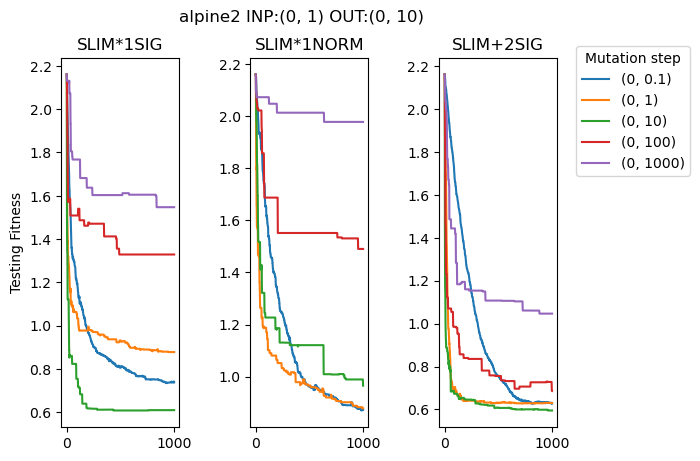

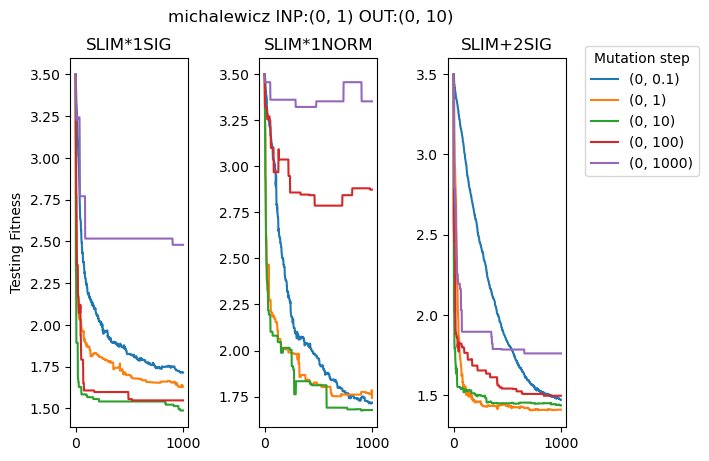

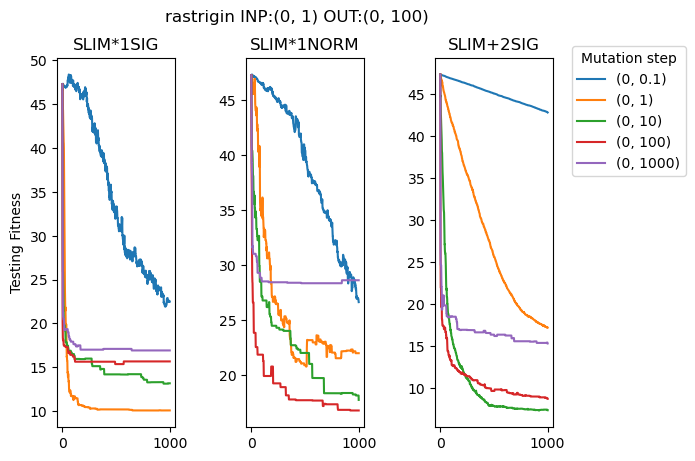

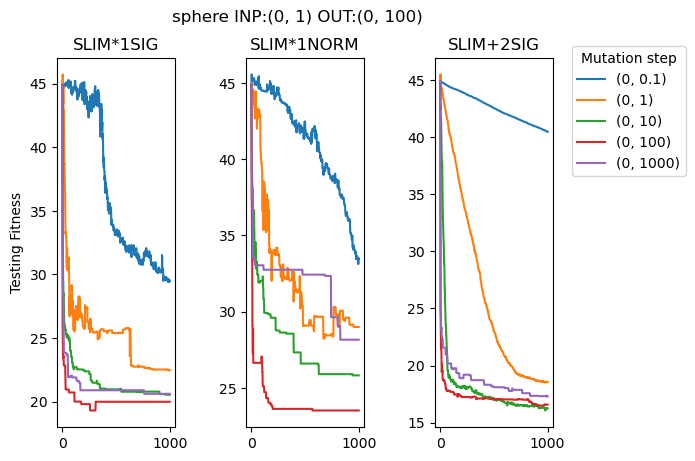

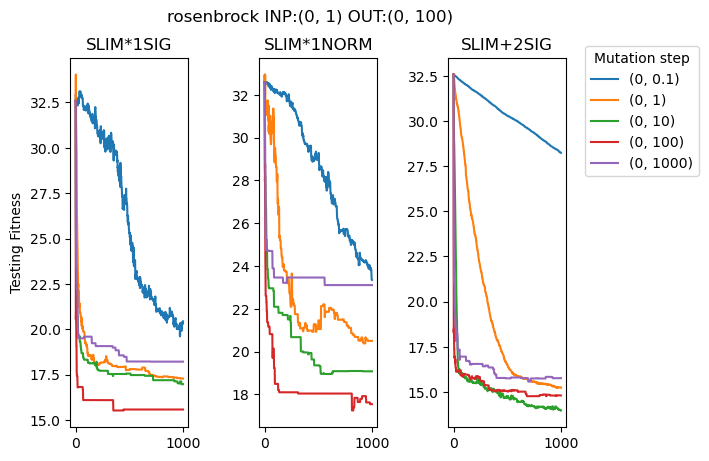

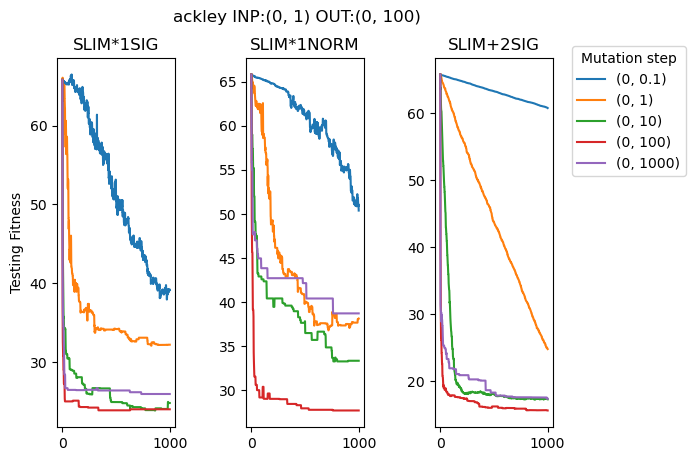

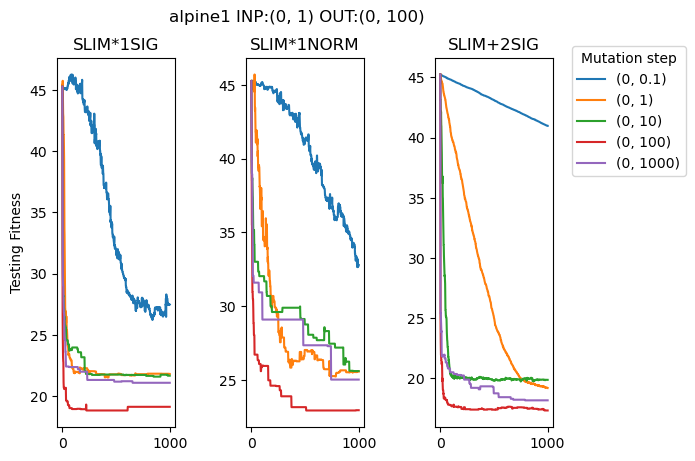

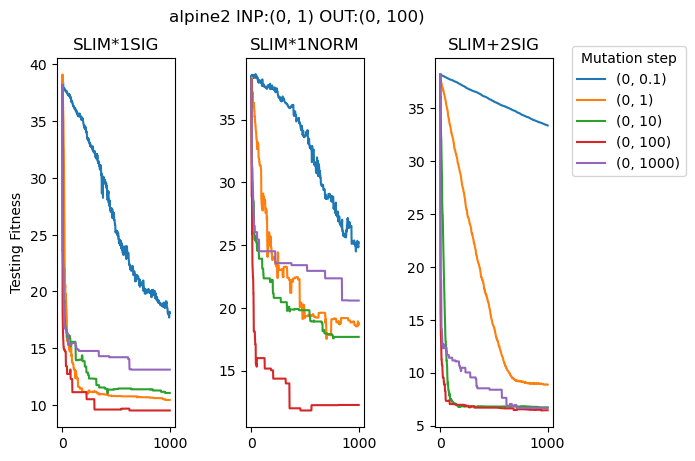

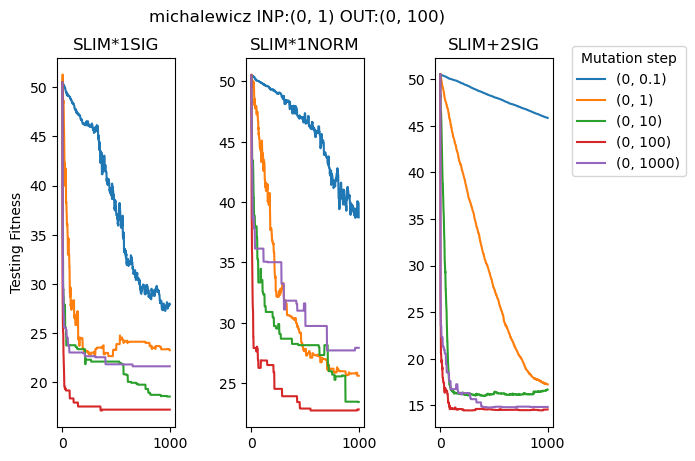

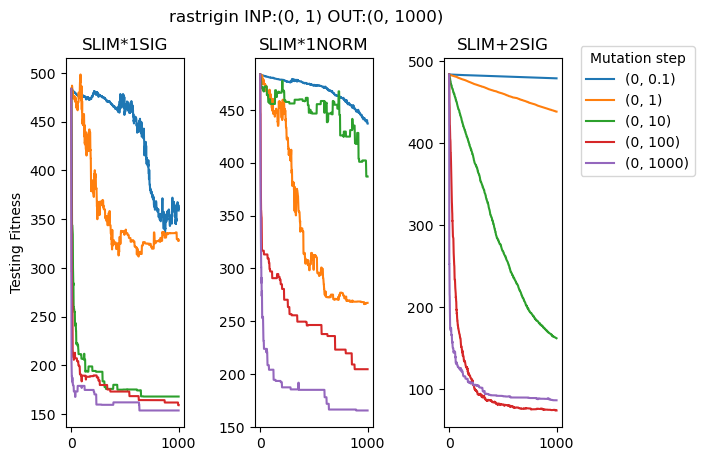

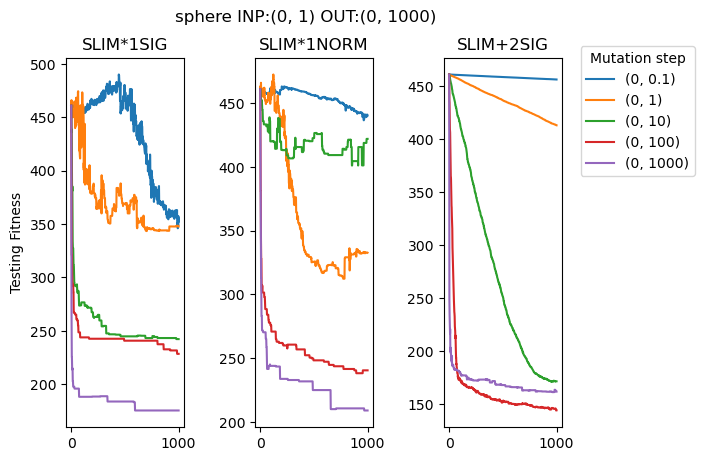

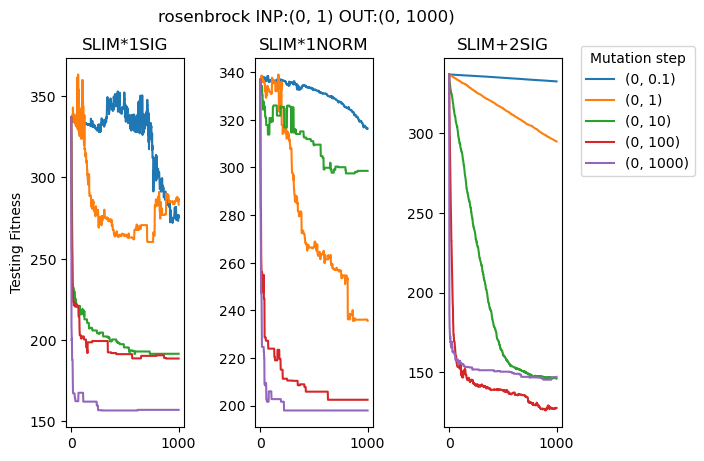

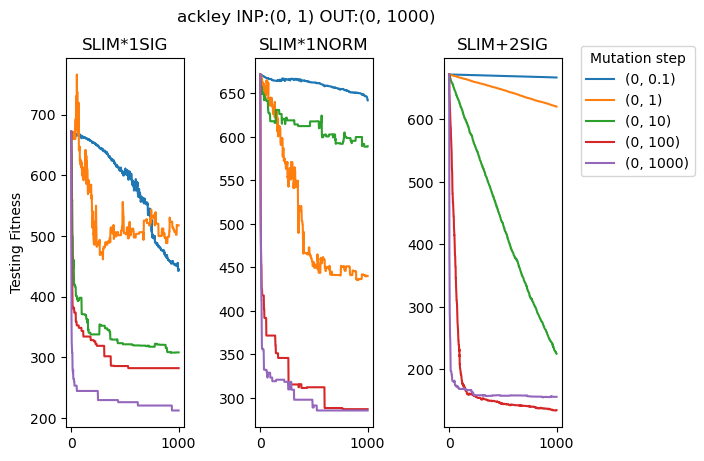

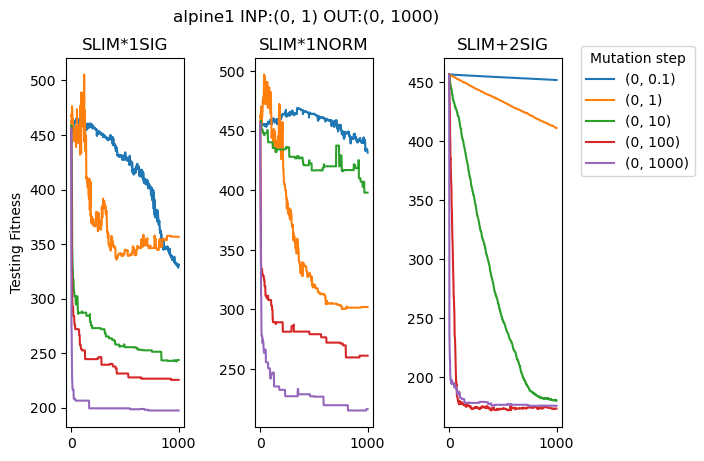

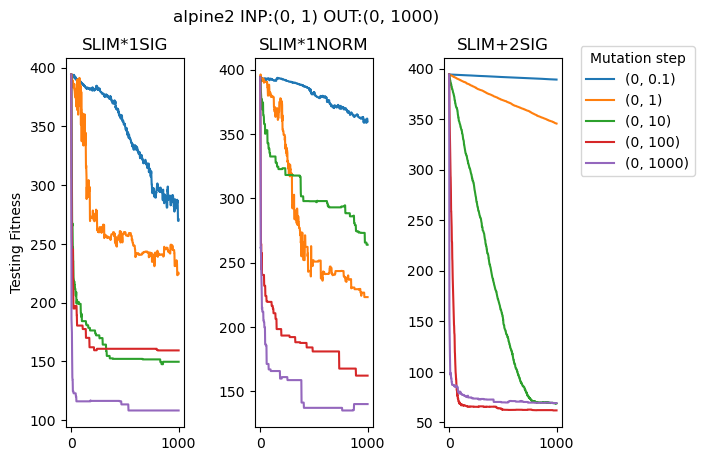

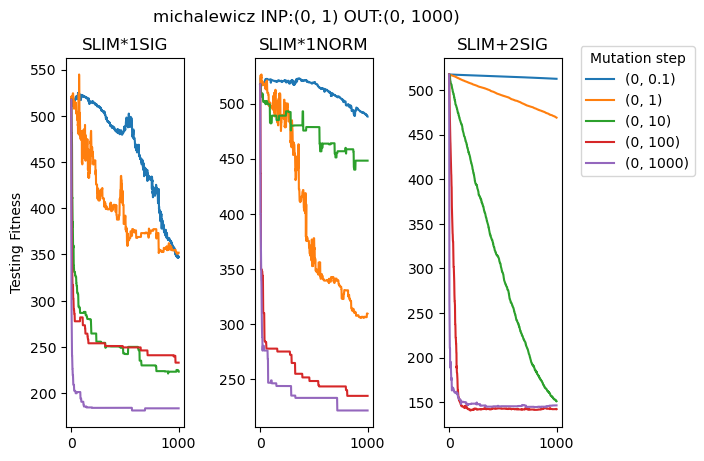

In [10]:
for out in data['output_scale'].unique():
    for inp in data['input_scale'].unique():
        for dataset in data['dataset'].unique():
            
            grouped = data.query("dataset == @dataset and output_scale == @out and input_scale == @inp") \
            [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
            
#             for algo in data["algo"].unique():
        
            

#             ax1 = pl.subplot(gs[0, 0]) 
#             pl.plot(grouped.index, grouped['training_fitness'], label = algo)
#             ax1.set_ylabel('Training Fitness')
#             ax1.set_title(data)
            if not grouped.values.shape[0] == 0 and out != inp:
            
                grouped.reset_index(inplace = True)

                
                gs = gridspec.GridSpec(1, 3)
                gs.update( wspace=0.6, hspace =  0.5)
                pl.figure()

                plt.suptitle(dataset + ' INP:' + str(inp) + ' OUT:' + str(out))
        
                for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
                    ax1 = pl.subplot(gs[0, 0]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
                    ax1.set_ylabel('Testing Fitness')
                    ax1.set_title(algorithms[0])
                    
                for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
                    ax2 = pl.subplot(gs[0, 1]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
                    ax2.set_title(algorithms[1])

                for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
                    ax3 = pl.subplot(gs[0, 2]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
                    ax3.set_title(algorithms[2])
                    ax3.legend(bbox_to_anchor=(1.1, 1.05), title = 'Mutation step')

                plt.show()


#             ax3 = pl.subplot(gs[0, 2]) 
#             pl.plot(grouped.index, grouped['elite_size'], label = algo)
#             ax3.set_ylim(0, 3000)
#             ax3.set_ylabel('Elite size')
#             ax3.legend(bbox_to_anchor=(1.1, 1.05))
    

In [11]:
results = []
for out in data['output_scale'].unique():
    for inp in data['input_scale'].unique():
        data_rank = []
            
        for algorithm in algorithms:
            for dataset in data['dataset'].unique():
            
                grouped = data.query("dataset == @dataset and output_scale == @out and input_scale == @inp and generation == 1000") \
                [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
                grouped.reset_index(inplace = True)
                data_rank.append(rankdata([grouped.query("algo == @algo_")['test_fitness'].values[0] for algo_ in list(filter(lambda x: algorithm in x, grouped.algo.unique()))]))

            if not grouped.values.shape[0] == 0: 
                results.append([' INP:' + str(inp) + ' OUT:' + str(out)] + [algorithm] + np.median(data_rank, axis = 0).tolist() )


In [12]:
results

[[' INP:(0, 1) OUT:(0, 1)', 'SLIM*1SIG', 1.0, 2.0, 3.0, 4.0, 5.0],
 [' INP:(0, 1) OUT:(0, 1)', 'SLIM*1NORM', 1.0, 2.0, 3.0, 4.0, 5.0],
 [' INP:(0, 1) OUT:(0, 1)', 'SLIM+2SIG', 1.0, 2.0, 3.0, 4.0, 5.0],
 [' INP:(0, 10) OUT:(0, 1)', 'SLIM*1SIG', 3.5, 1.0, 2.0, 4.0, 4.5],
 [' INP:(0, 10) OUT:(0, 1)', 'SLIM*1NORM', 3.25, 1.0, 2.5, 4.0, 4.0],
 [' INP:(0, 10) OUT:(0, 1)', 'SLIM+2SIG', 3.0, 1.0, 3.0, 4.0, 5.0],
 [' INP:(0, 100) OUT:(0, 1)', 'SLIM*1SIG', 3.5, 1.0, 2.0, 4.0, 4.0],
 [' INP:(0, 100) OUT:(0, 1)', 'SLIM*1NORM', 3.5, 1.0, 2.0, 4.0, 4.0],
 [' INP:(0, 100) OUT:(0, 1)', 'SLIM+2SIG', 3.0, 1.0, 2.0, 4.0, 5.0],
 [' INP:(0, 1000) OUT:(0, 1)', 'SLIM*1SIG', 3.0, 1.0, 3.0, 4.0, 5.0],
 [' INP:(0, 1000) OUT:(0, 1)', 'SLIM*1NORM', 3.0, 1.0, 2.0, 4.0, 5.0],
 [' INP:(0, 1000) OUT:(0, 1)', 'SLIM+2SIG', 2.0, 1.0, 3.0, 4.0, 5.0],
 [' INP:(0, 1) OUT:(0, 10)', 'SLIM*1SIG', 2.0, 3.0, 2.0, 4.0, 5.0],
 [' INP:(0, 1) OUT:(0, 10)', 'SLIM*1NORM', 1.0, 2.0, 3.0, 4.0, 5.0],
 [' INP:(0, 1) OUT:(0, 10)', 'SLIM+2

In [13]:
results_df = pd.DataFrame(results, columns = ['Dimensions', 'Algorithm', '(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)'])
results_df.set_index(['Dimensions', 'Algorithm'], inplace = True, drop = True)

In [14]:
results_df

(0, 0.1)  (0, 1)  (0, 10)  (0, 100)  \
Dimensions                  Algorithm                                         
INP:(0, 1) OUT:(0, 1)       SLIM*1SIG       1.00     2.0      3.0       4.0   
                            SLIM*1NORM      1.00     2.0      3.0       4.0   
                            SLIM+2SIG       1.00     2.0      3.0       4.0   
INP:(0, 10) OUT:(0, 1)      SLIM*1SIG       3.50     1.0      2.0       4.0   
                            SLIM*1NORM      3.25     1.0      2.5       4.0   
                            SLIM+2SIG       3.00     1.0      3.0       4.0   
INP:(0, 100) OUT:(0, 1)     SLIM*1SIG       3.50     1.0      2.0       4.0   
                            SLIM*1NORM      3.50     1.0      2.0       4.0   
                            SLIM+2SIG       3.00     1.0      2.0       4.0   
INP:(0, 1000) OUT:(0, 1)    SLIM*1SIG       3.00     1.0      3.0       4.0   
                            SLIM*1NORM      3.00     1.0      2.0       4.0   
                            SLIM+2SIG       2.00     1.0      3.0       4.0   
INP:(0, 1) OUT:(0, 10)      SLIM*1SIG       2.00     3.0      2.0       4.0   
                            SLIM*1NORM      1.00     2.0      3.0       4.0   
                            SLIM+2SIG       2.00     2.0      2.0       4.0   
INP:(0, 10) OUT:(0, 10)     SLIM*1SIG       1.00     2.0      2.0       3.0   
                            SLIM*1NORM      1.50     2.0      2.0       3.5   
                            SLIM+2SIG       2.00     2.0      2.0       4.0   
INP:(0, 1) OUT:(0, 100)     SLIM*1SIG       5.00     4.0      2.0       1.0   
                            SLIM*1NORM      5.00     3.0      2.0       1.0   
                            SLIM+2SIG       5.00     3.0      2.0       1.0   
INP:(0, 100) OUT:(0, 100)   SLIM*1SIG       4.00     5.0      2.0       3.0   
                            SLIM*1NORM      4.00     5.0      2.0       2.0   
                            SLIM+2SIG       4.00     4.0      2.0       2.0   
INP:(0, 1) OUT:(0, 1000)    SLIM*1SIG       4.00     5.0      3.0       2.0   
                            SLIM*1NORM      5.00     3.5      3.5       2.0   
                            SLIM+2SIG       5.00     4.0      3.0       2.0   
INP:(0, 1000) OUT:(0, 1000) SLIM*1SIG       4.00     5.0      3.0       1.0   
                            SLIM*1NORM      4.00     5.0      3.0       1.0   
                            SLIM+2SIG       4.00     4.0      3.0       1.0   

                                        (0, 1000)  
Dimensions                  Algorithm              
INP:(0, 1) OUT:(0, 1)       SLIM*1SIG         5.0  
                            SLIM*1NORM        5.0  
                            SLIM+2SIG         5.0  
INP:(0, 10) OUT:(0, 1)      SLIM*1SIG         4.5  
                            SLIM*1NORM        4.0  
                            SLIM+2SIG         5.0  
INP:(0, 100) OUT:(0, 1)     SLIM*1SIG         4.0  
                            SLIM*1NORM        4.0  
                            SLIM+2SIG         5.0  
INP:(0, 1000) OUT:(0, 1)    SLIM*1SIG         5.0  
                            SLIM*1NORM        5.0  
                            SLIM+2SIG         5.0  
INP:(0, 1) OUT:(0, 10)      SLIM*1SIG         5.0  
                            SLIM*1NORM        5.0  
                            SLIM+2SIG         5.0  
INP:(0, 10) OUT:(0, 10)     SLIM*1SIG         5.0  
                            SLIM*1NORM        5.0  
                            SLIM+2SIG         5.0  
INP:(0, 1) OUT:(0, 100)     SLIM*1SIG         3.0  
                            SLIM*1NORM        4.0  
                            SLIM+2SIG         3.0  
INP:(0, 100) OUT:(0, 100)   SLIM*1SIG         2.0  
                            SLIM*1NORM        2.5  
                            SLIM+2SIG         3.0  
INP:(0, 1) OUT:(0, 1000)    SLIM*1SIG         1.0  
                            SLIM*1NORM        1.0  
                            SLIM+2SIG         1.0  
INP

In [15]:
results_df[['(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)']] = results_df[['(0, 0.1)', '(0, 1)', '(0, 10)', '(0, 100)', '(0, 1000)']].apply(lambda x: round(x, 2))

In [16]:
print(results_df.to_latex())

\begin{tabular}{llrrrrr}
\toprule
 &  & (0, 0.1) & (0, 1) & (0, 10) & (0, 100) & (0, 1000) \\
Dimensions & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{ INP:(0, 1) OUT:(0, 1)} & SLIM*1SIG & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 \\
 & SLIM*1NORM & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 \\
 & SLIM+2SIG & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 \\
\cline{1-7}
\multirow[t]{3}{*}{ INP:(0, 10) OUT:(0, 1)} & SLIM*1SIG & 3.500000 & 1.000000 & 2.000000 & 4.000000 & 4.500000 \\
 & SLIM*1NORM & 3.250000 & 1.000000 & 2.500000 & 4.000000 & 4.000000 \\
 & SLIM+2SIG & 3.000000 & 1.000000 & 3.000000 & 4.000000 & 5.000000 \\
\cline{1-7}
\multirow[t]{3}{*}{ INP:(0, 100) OUT:(0, 1)} & SLIM*1SIG & 3.500000 & 1.000000 & 2.000000 & 4.000000 & 4.000000 \\
 & SLIM*1NORM & 3.500000 & 1.000000 & 2.000000 & 4.000000 & 4.000000 \\
 & SLIM+2SIG & 3.000000 & 1.000000 & 2.000000 & 4.000000 & 5.000000 \\
\cline{1-7}
\multirow[t]{3}{*}{ INP:(0, 1000) OUT:(0, 1)} & S